## Pandas Conti...
### Combining
- Joining two data Sets
- Adding a new row in a data set
- Adding a new column in a data set

In [1]:
dict1 = {'Name' : ['Niha','Lavanya','Alekya','Naga'],
        'Branch' : ['cse','eee','civil','mech']}

dict2 = {'Name' : ['Niharika','Girish','latha','Mounika'],
        'Branch' : ['ece','mbbs','civil','mech']}

In [2]:
import pandas as pd
import numpy as np

In [3]:
d1 = pd.DataFrame(dict1)
d2 = pd.DataFrame(dict2)

In [4]:
d1

,Name,Branch
0,Niha,cse
1,Lavanya,eee
2,Alekya,civil
3,Naga,mech


In [5]:
d2

,Name,Branch
0,Niharika,ece
1,Girish,mbbs
2,latha,civil
3,Mounika,mech


In [6]:
pd.concat([d1,d2], axis = 0)

,Name,Branch
0,Niha,cse
1,Lavanya,eee
2,Alekya,civil
3,Naga,mech
0,Niharika,ece
1,Girish,mbbs
2,latha,civil
3,Mounika,mech


In [7]:
pd.concat([d1,d2], axis = 1)

,Name,Branch,Name,Branch
0,Niha,cse,Niharika,ece
1,Lavanya,eee,Girish,mbbs
2,Alekya,civil,latha,civil
3,Naga,mech,Mounika,mech


In [8]:
## Adding a row in data set
d2

,Name,Branch
0,Niharika,ece
1,Girish,mbbs
2,latha,civil
3,Mounika,mech


In [10]:
d2.append({'Name' : 'abc','Branch' : 'ijk'},ignore_index = True)

,Name,Branch
0,Niharika,ece
1,Girish,mbbs
2,latha,civil
3,Mounika,mech
4,abc,ijk


In [11]:
# Adding column in a data set

In [14]:
d2.shape

(4, 2)

In [16]:
d2.shape[0]

4

In [17]:
rollnum = []
for i in range(1, d2.shape[0]+1):
    rollnum.append(i)
rollnum

[1, 2, 3, 4]

In [18]:
d2['RollNum'] = rollnum

In [19]:
d2

,Name,Branch,RollNum
0,Niharika,ece,1
1,Girish,mbbs,2
2,latha,civil,3
3,Mounika,mech,4


In [20]:
d2['col'] = ['a','b','c','d']

In [21]:
d2

,Name,Branch,RollNum,col
0,Niharika,ece,1,a
1,Girish,mbbs,2,b
2,latha,civil,3,c
3,Mounika,mech,4,d


## Data Preprocessing with Scikit-Learn
- Scikit-Learn is a library in Machine Learning
- It supports a machine learning algorithm like SVM, knn, Neural networks etc
- It supports different types of Data Preprocessing methods

- Scalling is used to compressing the values into a fixed range(0,1)

In [24]:
d = pd.DataFrame({
    'x1': np.random.normal(0,2,10000),
    'x2': np.random.normal(5,3,10000),
    'x3': np.random.normal(-5,5,10000)
})
d.head()

,x1,x2,x3
0,-0.004146,1.857470,-2.392754
1,-0.360610,2.192193,-6.975072
2,0.723710,2.309546,-11.386868
3,1.635300,11.730679,-3.809739
4,2.076113,8.191363,-3.698460


In [25]:
d.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,0.027053,5.031161,-4.996292
std,1.998695,2.981465,5.006890
min,-7.737743,-6.891879,-25.893197
25%,-1.309854,3.002075,-8.376159
50%,0.027735,5.044709,-5.003291
75%,1.344443,7.010010,-1.653549
max,8.104804,15.677212,14.961898


## Scaling Techniques
- Standard Scaler
- Robust Scaler
- MinMax Scaler
- Normalization

### Standard Scaler
- [Xi - mean(X)] / std(X)

In [26]:
from sklearn import preprocessing

In [27]:
sc1 = preprocessing.StandardScaler()

In [29]:
sc1_d = sc1.fit_transform(d)

In [30]:
sc1_d

array([[-0.01561045, -1.06452711,  0.52001709],
       [-0.19396734, -0.95225346, -0.39523123],
       [ 0.34857344, -0.91289072, -1.27642008],
       ...,
       [-0.64279718,  0.72311908, -0.32339278],
       [ 0.20664193,  0.25878622,  1.10737799],
       [ 0.75767056, -0.07036483, -0.28716265]])

In [32]:
sc1_data = pd.DataFrame(sc1_d,columns = d.columns)

In [34]:
sc1_data.head()

,x1,x2,x3
0,-0.015610,-1.064527,0.520017
1,-0.193967,-0.952253,-0.395231
2,0.348573,-0.912891,-1.276420
3,0.804689,2.247168,0.236996
4,1.025250,1.060002,0.259222


In [35]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

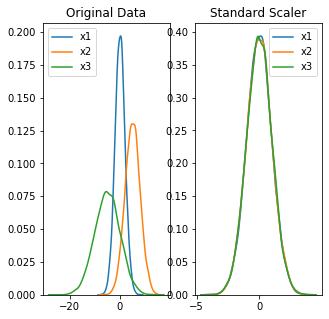

In [39]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (5,5))

ax1.set_title('Original Data')
sns.kdeplot(d['x1'],ax=ax1)
sns.kdeplot(d['x2'],ax=ax1)
sns.kdeplot(d['x3'],ax=ax1)
ax2.set_title('Standard Scaler')
sns.kdeplot(sc1_data['x1'],ax=ax2)
sns.kdeplot(sc1_data['x2'],ax=ax2)
sns.kdeplot(sc1_data['x3'],ax=ax2)
plt.show()

## Robust Scaler
- The range is between interquartile ranger(25% to 75%)
    - [Xi - Q1(X)] / [Q3(X) - Q1(X)]
        - Q1 --> 25%(Lower Quartile)
        - Q2 --> 75%(Upper Quartiler)

In [41]:
d.head()

,x1,x2,x3
0,-0.004146,1.857470,-2.392754
1,-0.360610,2.192193,-6.975072
2,0.723710,2.309546,-11.386868
3,1.635300,11.730679,-3.809739
4,2.076113,8.191363,-3.698460


In [43]:
rs = preprocessing.RobustScaler()

In [44]:
rs_d = rs.fit_transform(d)

In [45]:
rs_d

array([[-0.01201117, -0.79523233,  0.38832195],
       [-0.14630783, -0.7117172 , -0.29330598],
       [ 0.26220689, -0.68243709, -0.94956824],
       ...,
       [-0.4842614 ,  0.53451436, -0.23980455],
       [ 0.1553373 ,  0.18911879,  0.82575689],
       [ 0.57024307, -0.05572134, -0.21282229]])

## Normalizer
 - L1 norm also known as manhattan distance
     - Xi / sqrt(X1^2 + X2^2 + X^3)

In [46]:
d.head()

,x1,x2,x3
0,-0.004146,1.857470,-2.392754
1,-0.360610,2.192193,-6.975072
2,0.723710,2.309546,-11.386868
3,1.635300,11.730679,-3.809739
4,2.076113,8.191363,-3.698460


In [47]:
n = preprocessing.Normalizer()

In [48]:
n_d = n.fit_transform(d)

In [49]:
n_d

array([[-0.00136886,  0.61320733, -0.78992081],
       [-0.04926131,  0.29946599, -0.95283443],
       [ 0.06216773,  0.19839342, -0.97814888],
       ...,
       [-0.12769497,  0.72973649, -0.67169833],
       [ 0.07528477,  0.99274568,  0.09374555],
       [ 0.18827812,  0.58894673, -0.78593454]])

In [50]:
n_d = pd.DataFrame(n_d,columns = d.columns)

In [51]:
n_d.head()

,x1,x2,x3
0,-0.001369,0.613207,-0.789921
1,-0.049261,0.299466,-0.952834
2,0.062168,0.198393,-0.978149
3,0.131437,0.942848,-0.306206
4,0.225071,0.888022,-0.400949


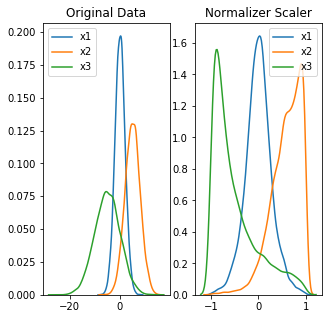

In [52]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (5,5))

ax1.set_title('Original Data')
sns.kdeplot(d['x1'],ax=ax1)
sns.kdeplot(d['x2'],ax=ax1)
sns.kdeplot(d['x3'],ax=ax1)
ax2.set_title('Normalizer Scaler')
sns.kdeplot(n_d['x1'],ax=ax2)
sns.kdeplot(n_d['x2'],ax=ax2)
sns.kdeplot(n_d['x3'],ax=ax2)
plt.show()

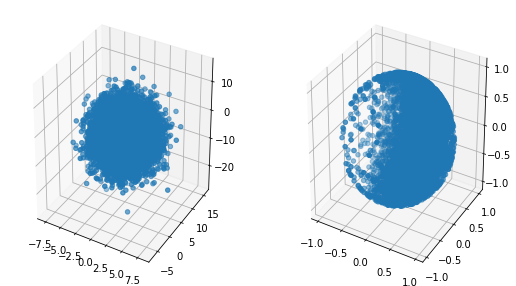

In [56]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (9,5))
ax1 = fig.add_subplot(121,projection = '3d')
ax2 = fig.add_subplot(122,projection = '3d')
ax1.scatter(d['x1'],d['x2'],d['x3'])
ax2.scatter(n_d['x1'],n_d['x2'],n_d['x3'])
plt.show()